In [11]:
import pandas as pd
import numpy as np
from cherenkovdeconvolution import util
from cherenkovdeconvolution import dsea
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

df=pd.read_csv('sample.csv', nrows=1000000)
X = df[['SPEFit2Bayesian.x',
        'SPEFit2BayesianFitParams.nmini',
        'SPEFit2_HVFitParams.nmini',
        'SplineMPE.zenith',
        'SplineMPECharacteristicsIC.avg_dom_dist_q_tot_dom',
        'SplineMPEDirectHitsD.dir_track_length',
        'SplineMPEDirectHitsICB.n_early_strings',
        'SplineMPEDirectHitsICB.n_late_doms',
        'SplineMPEDirectHitsICD.n_dir_strings',
        'SplineMPEDirectHitsICE.n_late_strings',
        'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value']]
Y = df['MCPrimary.energy']

In [2]:
binning_E = np.logspace(np.log10(Y.min()-10), np.log10(Y.max()+100), 13) 

In [3]:
binning_E

array([9.00004723e+01, 2.74929261e+02, 8.39841134e+02, 2.56550768e+03,
       7.83699365e+03, 2.39400841e+04, 7.31310566e+04, 2.23397354e+05,
       6.82423858e+05, 2.08463669e+06, 6.36805132e+06, 1.94528273e+07,
       5.94235930e+07])

In [4]:

overflow = 1e10
bins_over = np.append(binning_E,overflow)
binning_E = bins_over

Y = np.digitize(Y, binning_E)

In [5]:
Y = Y - 1

n_test = int(len(df)/10)

X_train = X.iloc[n_test:]
Y_train = Y[n_test:]

X_test = X.iloc[:n_test]
Y_test = Y[:n_test]

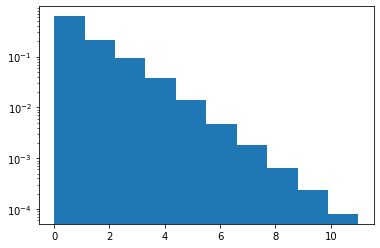

In [6]:
f_true = util.fit_pdf(Y_test) 
plt.hist(range(12), weights = f_true)
plt.yscale('log')

In [7]:
f_est = dsea(X_test, X_train, Y_train, GaussianNB(), K = 3)

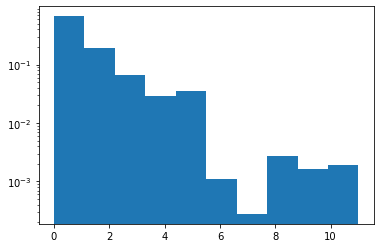

In [8]:
plt.hist(range(12), weights = f_est)
plt.yscale('log')

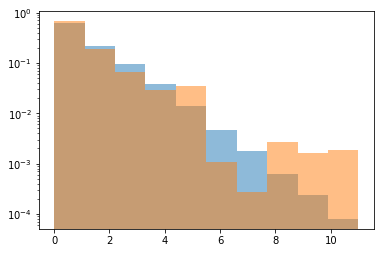

In [9]:
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_est, alpha = 0.5)
plt.yscale('log')
plt.show()